In [21]:
import sys

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory

In [22]:
def import_dataset(data_type = "training", validation_split = 0.2):
    data = image_dataset_from_directory(
        "path_to_dataset",
        labels = "inferred",
        image_size = [128, 128],
        interpolation = "nearest",
        batch_size = 64,
        validation_split = validation_split,
        subset = data_type,
        seed = 123
    )
    return data

In [32]:
train_data = import_dataset("training", 0.3)
validation_data = import_dataset("validation", 0.3)

disease_labels = train_data.class_names

train_data = train_data.cache().prefetch(buffer_size = tf.data.AUTOTUNE)
validation_data = validation_data.cache().prefetch(buffer_size = tf.data.AUTOTUNE)

Found 1105 files belonging to 4 classes.
Using 774 files for training.
Found 1105 files belonging to 4 classes.
Using 331 files for validation.


In [48]:
from tensorflow import keras
from tensorflow.keras import layers

from tensorflow.keras.layers.experimental import preprocessing

model = keras.Sequential([
    preprocessing.Rescaling(1./255, input_shape = [128, 128, 3]),

    preprocessing.RandomFlip("horizontal"),
    preprocessing.RandomContrast(0.5),
    preprocessing.RandomRotation(factor=0.20),
        
    layers.Conv2D(filters = 16, kernel_size = 3, activation = "relu", padding = "same", input_shape = [128, 128, 3]),
    layers.MaxPool2D(),
    layers.Conv2D(filters = 32, kernel_size = 3, activation = "relu", padding = "same"),
    layers.MaxPool2D(),
    layers.Conv2D(filters = 64, kernel_size = 3, activation = "relu", padding = "same"),
    layers.MaxPool2D(),
    layers.Conv2D(filters = 128, kernel_size = 3, activation = "relu", padding = "same"),
    layers.MaxPool2D(),
    
    layers.Flatten(),
    layers.Dense(units = 128, activation = "relu"),
    layers.Dropout(0.3),
    layers.Dense(units = 4, activation = "softmax")
])

In [49]:
model.compile(
    optimizer = tf.keras.optimizers.Adam(epsilon=0.01),
    loss = tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics = ["accuracy"]
)

history = model.fit(
    train_data,
    validation_data = validation_data,
    epochs = 200
)

Epoch 1/200
13/13 [==============================] - 6s 424ms/step - loss: 1.3690 - accuracy: 0.3488 - val_loss: 1.3312 - val_accuracy: 0.4169
Epoch 2/200
13/13 [==============================] - 5s 410ms/step - loss: 1.3317 - accuracy: 0.3566 - val_loss: 1.2795 - val_accuracy: 0.4169
Epoch 3/200
13/13 [==============================] - 5s 421ms/step - loss: 1.3094 - accuracy: 0.3630 - val_loss: 1.2692 - val_accuracy: 0.4169
Epoch 4/200
13/13 [==============================] - 6s 428ms/step - loss: 1.3049 - accuracy: 0.3708 - val_loss: 1.2632 - val_accuracy: 0.4290
Epoch 5/200
13/13 [==============================] - 5s 410ms/step - loss: 1.2934 - accuracy: 0.4005 - val_loss: 1.2497 - val_accuracy: 0.4290
Epoch 6/200
13/13 [==============================] - 6s 427ms/step - loss: 1.2858 - accuracy: 0.3824 - val_loss: 1.2397 - val_accuracy: 0.4713
Epoch 7/200
13/13 [==============================] - 5s 410ms/step - loss: 1.2697 - accuracy: 0.4483 - val_loss: 1.2126 - val_accuracy: 0.4622

Epoch 58/200
13/13 [==============================] - 5s 412ms/step - loss: 0.8429 - accuracy: 0.6525 - val_loss: 0.8059 - val_accuracy: 0.6828
Epoch 59/200
13/13 [==============================] - 5s 421ms/step - loss: 0.8666 - accuracy: 0.6344 - val_loss: 0.7711 - val_accuracy: 0.6918
Epoch 60/200
13/13 [==============================] - 5s 412ms/step - loss: 0.8441 - accuracy: 0.6705 - val_loss: 0.7637 - val_accuracy: 0.7009
Epoch 61/200
13/13 [==============================] - 5s 411ms/step - loss: 0.8391 - accuracy: 0.6589 - val_loss: 0.7607 - val_accuracy: 0.7009
Epoch 62/200
13/13 [==============================] - 5s 419ms/step - loss: 0.8648 - accuracy: 0.6537 - val_loss: 0.7717 - val_accuracy: 0.6949
Epoch 63/200
13/13 [==============================] - 5s 416ms/step - loss: 0.8270 - accuracy: 0.6667 - val_loss: 0.7742 - val_accuracy: 0.6888
Epoch 64/200
13/13 [==============================] - 5s 420ms/step - loss: 0.8407 - accuracy: 0.6563 - val_loss: 0.7848 - val_accuracy:

Epoch 115/200
13/13 [==============================] - 6s 428ms/step - loss: 0.6924 - accuracy: 0.7196 - val_loss: 0.8038 - val_accuracy: 0.6647
Epoch 116/200
13/13 [==============================] - 5s 416ms/step - loss: 0.7003 - accuracy: 0.7145 - val_loss: 0.8102 - val_accuracy: 0.6767
Epoch 117/200
13/13 [==============================] - 5s 408ms/step - loss: 0.6634 - accuracy: 0.7416 - val_loss: 0.8062 - val_accuracy: 0.6767
Epoch 118/200
13/13 [==============================] - 6s 427ms/step - loss: 0.7045 - accuracy: 0.7106 - val_loss: 0.8304 - val_accuracy: 0.6677
Epoch 119/200
13/13 [==============================] - 5s 413ms/step - loss: 0.7123 - accuracy: 0.7080 - val_loss: 0.7831 - val_accuracy: 0.7160
Epoch 120/200
13/13 [==============================] - 5s 417ms/step - loss: 0.6752 - accuracy: 0.7196 - val_loss: 0.7640 - val_accuracy: 0.7039
Epoch 121/200
13/13 [==============================] - 5s 421ms/step - loss: 0.6351 - accuracy: 0.7377 - val_loss: 0.7318 - val_ac

<AxesSubplot:>

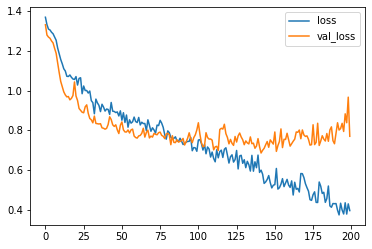

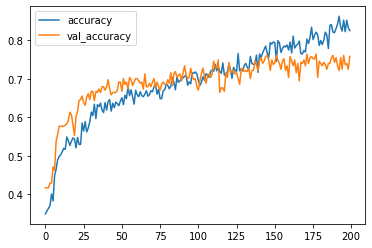

In [50]:
history_df = pd.DataFrame(history.history)

history_df.loc[:, ["loss", "val_loss"]].plot()
history_df.loc[:, ["accuracy", "val_accuracy"]].plot()

In [42]:
model.save("plant_disease_classifier.h5",
           save_format = "h5")